# KNN Regresion:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set1 =pd.read_csv("Salary Data1.csv")
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [3]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2051 non-null   float64
 1   Gender               2051 non-null   object 
 2   Education Level      2051 non-null   object 
 3   Job Title            2051 non-null   object 
 4   Years of Experience  2051 non-null   float64
 5   Salary               2051 non-null   float64
dtypes: float64(3), object(3)
memory usage: 96.4+ KB


In [4]:
data_set1.isnull().sum()

Age                    3
Gender                 3
Education Level        3
Job Title              3
Years of Experience    3
Salary                 3
dtype: int64

In [5]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)
data_set1.shape

(2054, 6)

In [7]:
data_set1['Job Title'].value_counts()

Junior HR Generalist                     110
Director of Marketing                    102
Software Project Manager                 102
Supply Chain Analyst                     102
Senior Graphic Designer                  102
Senior Business Analyst                   79
Senior Financial Analyst                  79
Principal Engineer                        75
Junior Operations Analyst                 72
Sales Manager                             71
Senior Product Manager                    71
Senior Operations Manager                 70
Junior Marketing Coordinator              62
Junior Product Manager                    58
Senior IT Project Manager                 54
Junior Advertising Coordinator            53
Customer Service Manager                  49
Director of Human Capital                 49
Senior Sales Manager                      49
Office Manager                            48
Junior Marketing Analyst                  48
Junior UX Designer                        46
Senior Acc

<Axes: >

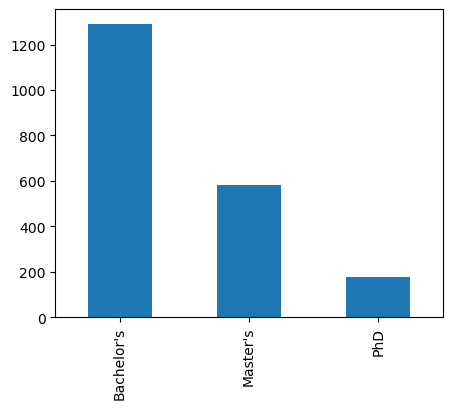

In [8]:
data_set1['Education Level'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

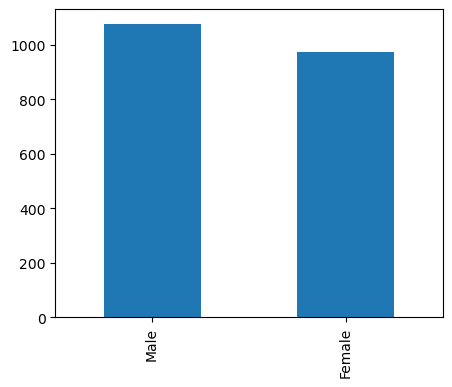

In [9]:
data_set1['Gender'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

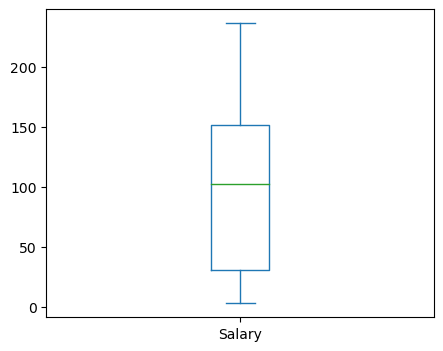

In [10]:
data_set1['Salary'].value_counts().plot(kind="box", figsize=(5, 4))

<Axes: >

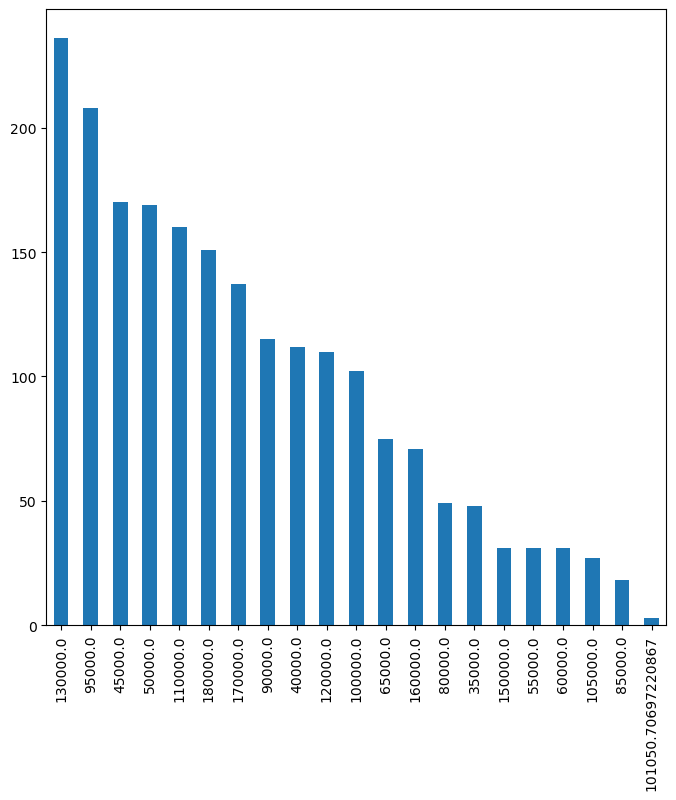

In [11]:
data_set1['Salary'].value_counts().plot(kind="bar", figsize=(8, 8))


In [12]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [13]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,1,0,27,14.0,130000.0
1,42.0,0,1,25,15.0,110000.0
2,37.0,1,0,37,9.0,95000.0
3,50.0,0,0,38,22.0,130000.0
4,32.0,1,1,22,6.0,90000.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.653901,1,0,0.649632,0.422741,130000.0
1,0.519960,0,1,0.475413,0.566362,110000.0
2,-0.149745,1,0,1.520728,-0.295365,95000.0
3,1.591489,0,0,1.607837,1.571711,130000.0
4,-0.819450,1,1,0.214084,-0.726229,90000.0


In [15]:
X=data_set1[["Age","Gender","Education Level","Job Title","Years of Experience"]]
y=data_set1[["Salary"]]

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score ,r2_score


knn_regressor = KNeighborsRegressor(n_neighbors=200)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
     

In [71]:

print("Best R2 Score is {0:.2f}% :". format( 100*best_r2))

Best R2 Score is 99.86% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (KNN Regression)')

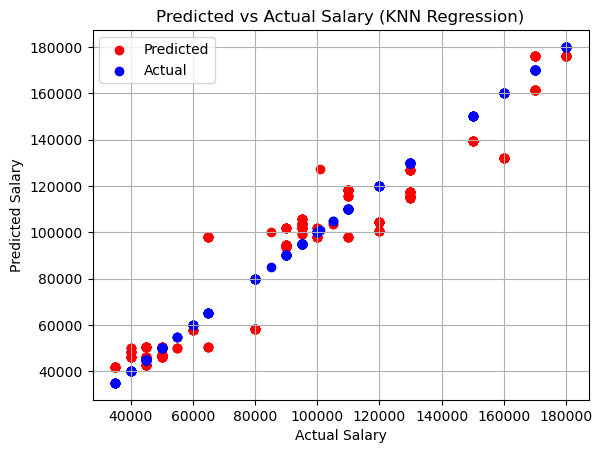

In [69]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (KNN Regression)')
